<a href="https://colab.research.google.com/github/giavonnadonati/Data_Science/blob/main/Donati_Hahn_Stats_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Midterm Project

Directions:

*   Use any and all resources available to you
*   Comment and explain the code
*   Answer the questions to the best of your abilities
*   There are no points for pain: ask for help

Save this notebook to your GitHub and submit the link.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# importing the software as an abbreviation

## Part 1: Getting your data

Create a google form to input your data.
Follow the same method as [Lab 5](https://colab.research.google.com/drive/1zYvyhrz2wVnJXlZqj_PpxOxplfS3LN9Y?usp=sharing).

In [14]:
import pandas as pd
def get_database(url): # This function loads the google spreadsheet
    url_head = "https://docs.google.com/spreadsheets/d/"
    url_foot = "/gviz/tq?tqx=out:csv&sheet="
    url_body = url.split('/')[5]
    sheet_name = "1"
    url_csv = url_head + url_body + url_foot + sheet_name
    df = pd.read_csv(url_csv, sep=',', skiprows=0)
    return df
  

Put your form url here:

In [3]:
url = 'https://docs.google.com/spreadsheets/d/1bwE55Ki4nLQF8nnwgCe7KVoqUcAb1f4uH0eIsG92mRk/edit?usp=sharing'


In [13]:
data = get_database(url)
data = np.array(data)
print(data, data.shape)
# displaying the data as an array

[['10/31/2022 13:15:53' 'CD' 12 38]
 ['10/31/2022 13:16:25' 'Bottle Lid' 9 28]
 ['10/31/2022 13:16:39' 'Frisbee' 20 63]
 ['10/31/2022 13:16:55' 'Bowl' 7 22]
 ['10/31/2022 13:17:14' 'Key ring' 2 6]] (5, 4)


In [12]:
circumferences = data[:,3]
diameters = data[:,2]
print(diameters, circumferences)
# defining the circumferences and diameters as 2nd and 3rd columns in the data, getting rid of the time stamps

[12 9 20 7 2] [38 28 63 22 6]


Plot your data points

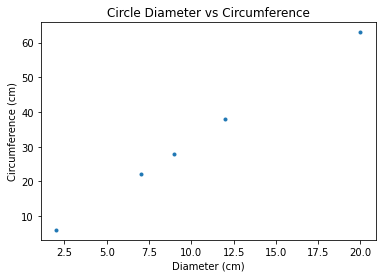

In [11]:
plt.title("Circle Diameter vs Circumference")
# plot title

plt.xlabel("Diameter (cm)")
plt.ylabel("Circumference (cm)")
# plot labels

plt.plot(diameters, circumferences, '.');
# plotting diameters as x, circumferences as y, defining type of line wanted

## Part 2: Linear Fit

Follow the steps in the [Linear Fit notebook]() to run a linear fit on your data.

In [10]:
best_loss = 100000000

best_m = None
best_b = None
# giving a baseline best m, b, and loss to compare to the m guess and b guesses being run to find true line of best fit

for m_guess in np.linspace(0, 25, 400):
    for b_guess in np.linspace(0, 25, 400):
      # running linspace from 0 to 25 with 400 guesses

        y_guess = m_guess * diameters + b_guess
        # defining y guess as equation for a line using the best guesses and diameters for x

        loss = np.sum((y_guess - circumferences)**2)

        if loss < best_loss:
            
            best_loss = loss
            best_m = m_guess
            best_b = b_guess 
            # comparing the baseline best loss, m, and b to the guesses being run in the for loop, to create a new best loss, m, and b


Plot the line of best fit:

Use blue dots for the collected data and a red line for the estimate.

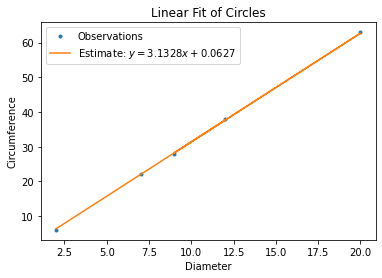

In [9]:
plt.title('Linear Fit of Circles')

plt.xlabel('Diameter')
plt.ylabel('Circumference')

# Plot the collected data
plt.plot(diameters, circumferences, '.', label='Observations')

y_estimate = best_m * diameters + best_b
#defining a y estimate in terms of the best guesses

# Plot the line of best fit
plt.plot(diameters, y_estimate, label=f'Estimate: $y = {round(best_m, 4)} x + {round(best_b, 4)}$')
# plotting diameters as x, y_estimate as y, setting a label, then rounding m and b to 4 decimal points

plt.legend();

The estimated relationship is:

$C = 3.13D + 0.06$

## Part 3: Interpretation

Answer the questions in text cells

#### Question 1:

What do $m$ and $b$ represent in these equations?


In the function, m represents the slope of the equation and b is the y-int.

#### Question 2:

Guess what the correct values $m$ and $b$ should be.

The correct value of the slope should be pi, as the formula for circumference is 2Rpi, which is the same as diameter*pi. The y-intercept should be 0.

#### Question 3:

Does it make sense to include $b$ in the parameters?

Not necessarily, as the best guess for b is already included in y_estimate.

## Bonus:

These problems are extra credit. You may use any resources, but be sure to explain your code.

#### Bonus 1: Plot the squared errors from your line of best fit

In [ ]:
plt.title("Fit Errors")

plt.xlabel("Diameter")
plt.ylabel("Squared Error")

squared_error = ...

plt.plot(..., 'b.', label = "Errors")

plt.legend();

#### Bonus 2: Plot the errors as a histogram

In [ ]:
plt.title("Errors")

...

What distribution does this histogram look like?

#### Bonus 3: Find the circle with the largest error. 
Hint: use np.max

In [ ]:
largest_error = ...

#### Bonus 4: Remove the circles with the 2 largest errors and run the fit again.


In [ ]:
...

What is the difference in your error?

#### Bonus 5: Find and explain a better method of fitting this data